In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set it to your desired number of threads
import missingno as msno

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & Bold for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 20 

In [3]:
# ==================================================================================================
# READ DATA
# ==================================================================================================
import csv
url_df_data               = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET8\df_results_copy.xls"
df_results = pd.read_csv(url_df_data)

print("Datasets loaded succesfully ! :D")

Datasets loaded succesfully ! :D


In [54]:
df_results

,Method,Representation,Type Category,Classifier Name,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy,Method_Representation
0,TF-IDF,t-SNE,top_category,RANDOM FOREST,0.23,1.89,0.84,0.93,TF-IDF_t-SNE
1,BOW,t-SNE,top_category,RANDOM FOREST,0.23,2.40,0.80,0.91,BOW_t-SNE
2,Word2Vec_SKIPGRAMS,t-SNE,top_category,RANDOM FOREST,0.08,3.85,0.76,0.89,Word2Vec_SKIPGRAMS_t-SNE
3,TF-IDF,t-SNE,top_category,Decision Tree,0.20,2.35,0.77,0.89,TF-IDF_t-SNE
4,USE,t-SNE,top_category,RANDOM FOREST,0.18,3.47,0.76,0.89,USE_t-SNE
...,...,...,...,...,...,...,...,...,...
115,DEBERTA,PCA,top_category,Logistic Regression,0.25,1.01,0.11,0.28,DEBERTA_PCA
116,Bag of Bigram,PCA,top_category,SVM (LinearSVC),0.57,0.54,0.15,0.25,Bag of Bigram_PCA
117,Bag of Bigram,PCA,top_category,Logistic Regression,0.35,0.76,0.20,0.25,Bag of Bigram_PCA
118,Bag of Trigram,PCA,top_category,SVM (LinearSVC),0.19,0.73,0.10,0.23,Bag of Trigram_PCA


In [55]:
df_results['Classifier Name'].unique()

array(['RANDOM FOREST', 'Decision Tree', 'KNN', 'SVM (RBF)',
       'Logistic Regression', 'SVM (LinearSVC)'], dtype=object)

In [56]:
# ==================================================================================================
# CREATE df_merged for ARI 
# ==================================================================================================
# Select all rows for the classifier 'RANDOM FOREST'
df_RANDOM_FOREST       = df_results[df_results['Classifier Name'] == 'RANDOM FOREST']
df_Decision_Tree       = df_results[df_results['Classifier Name'] == 'Decision Tree']
df_KNN                 = df_results[df_results['Classifier Name'] == 'KNN']
df_SVM_RBF             = df_results[df_results['Classifier Name'] == 'SVM (RBF)']
df_Logistic_Regression = df_results[df_results['Classifier Name'] == 'Logistic Regression']
df_SVM_linear          = df_results[df_results['Classifier Name'] == 'SVM (LinearSVC)']


# 1
df_merged = df_RANDOM_FOREST[['Method_Representation', 'Adjusted Rand Index']]
df_merged.columns = ['Method_Representation', 'ARI_RANDOM_FOREST']

# 2
df_merged = df_merged.merge(df_Decision_Tree[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_DECISION_TREE'}, inplace=True)
# 3
df_merged = df_merged.merge(df_KNN[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_KNN'}, inplace=True)
# 4
df_merged = df_merged.merge(df_SVM_RBF[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_SVM_RBF'}, inplace=True)
# 5
df_merged = df_merged.merge(df_Logistic_Regression[['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_Logistic_Regression'}, inplace=True)
# 6
df_merged = df_merged.merge(df_SVM_linear [['Method_Representation', 'Adjusted Rand Index']], 
                            on='Method_Representation', how='outer')
df_merged.rename(columns={'Adjusted Rand Index': 'ARI_SVM_linear'}, inplace=True)


df_merged = df_merged.sort_values(by='ARI_RANDOM_FOREST', ascending=True)
display(df_merged)

,Method_Representation,ARI_RANDOM_FOREST,ARI_DECISION_TREE,ARI_KNN,ARI_SVM_RBF,ARI_Logistic_Regression,ARI_SVM_linear
19,DEBERTA_PCA,0.17,0.14,0.20,0.19,0.11,0.10
18,BERT_PCA,0.22,0.17,0.24,0.26,0.12,0.13
17,Bag of Quadrigram_PCA,0.28,0.31,0.25,0.11,0.17,0.10
15,Bag of Trigram_PCA,0.33,0.36,0.30,0.10,0.17,0.10
16,USE_PCA,0.35,0.33,0.32,0.38,0.27,0.26
14,Bag of Bigram_PCA,0.40,0.38,0.39,0.24,0.20,0.15
11,Bag of Quadrigram_t-SNE,0.41,0.34,0.45,0.20,0.15,0.16
13,Word2Vec_CBOW_PCA,0.42,0.39,0.37,0.33,0.31,0.32
10,BOW_PCA,0.43,0.38,0.39,0.23,0.23,0.23
8,Word2Vec_SKIPGRAMS_PCA,0.43,0.34,0.36,0.41,0.37,0.29


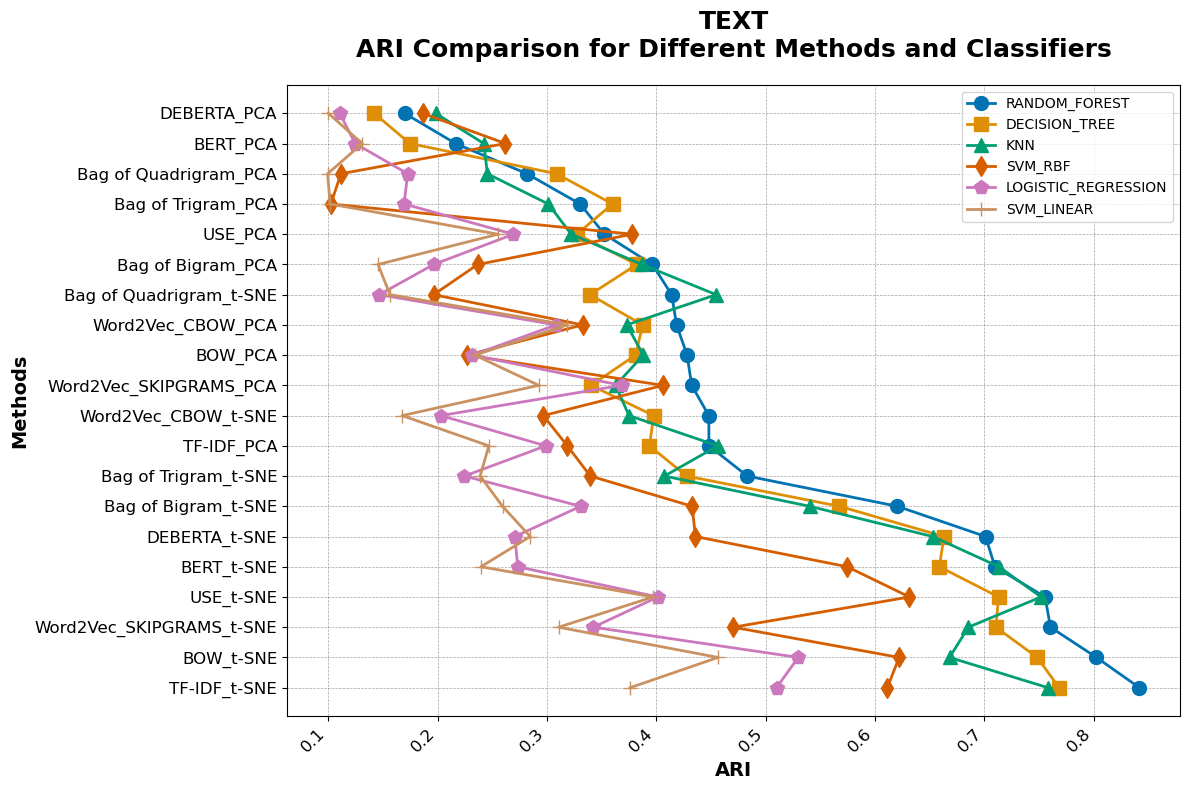

In [57]:
# ==================================================================================================
# PLOT ARI
# ==================================================================================================
# Set the figure size
plt.figure(figsize=(12, 8))
palette = sns.color_palette("colorblind")
# Plot the lines with markers, but with reversed x and y axes
plt.plot(df_merged['ARI_RANDOM_FOREST']      , df_merged['Method_Representation'], marker='o', color=palette[0], label='RANDOM_FOREST', linewidth=2)
plt.plot(df_merged['ARI_DECISION_TREE']      , df_merged['Method_Representation'], marker='s', color=palette[1], label='DECISION_TREE', linewidth=2)
plt.plot(df_merged['ARI_KNN']                , df_merged['Method_Representation'], marker='^', color=palette[2], label='KNN', linewidth=2)
plt.plot(df_merged['ARI_SVM_RBF']            , df_merged['Method_Representation'], marker='d', color=palette[3], label='SVM_RBF', linewidth=2)
plt.plot(df_merged['ARI_Logistic_Regression'], df_merged['Method_Representation'], marker='p', color=palette[4], label='LOGISTIC_REGRESSION', linewidth=2)
plt.plot(df_merged['ARI_SVM_linear']         , df_merged['Method_Representation'], marker='+', color=palette[5], label='SVM_LINEAR', linewidth=2)


# Add labels and title
plt.xlabel('ARI')
plt.ylabel('Methods')
plt.title('TEXT\nARI Comparison for Different Methods and Classifiers')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Invert the y-axis to reverse the order of models
plt.gca().invert_yaxis()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [58]:
# ==================================================================================================
# CREATE df_merged for ACCURACY
# ==================================================================================================
# Select all rows for the classifier 'RANDOM FOREST'
df_RANDOM_FOREST       = df_results[df_results['Classifier Name'] == 'RANDOM FOREST']
df_Decision_Tree       = df_results[df_results['Classifier Name'] == 'Decision Tree']
df_KNN                 = df_results[df_results['Classifier Name'] == 'KNN']
df_SVM_RBF             = df_results[df_results['Classifier Name'] == 'SVM (RBF)']
df_Logistic_Regression = df_results[df_results['Classifier Name'] == 'Logistic Regression']
df_SVM_linear          = df_results[df_results['Classifier Name'] == 'SVM (LinearSVC)']


# 1
df_merged_accuracy = df_RANDOM_FOREST[['Method_Representation', 'Accuracy']]
df_merged_accuracy.columns = ['Method_Representation', 'ACCURACY_RANDOM_FOREST']

# 2
df_merged_accuracy = df_merged_accuracy.merge(df_Decision_Tree[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_DECISION_TREE'}, inplace=True)
# 3
df_merged_accuracy = df_merged_accuracy.merge(df_KNN[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_KNN'}, inplace=True)
# 4
df_merged_accuracy = df_merged_accuracy.merge(df_SVM_RBF[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_SVM_RBF'}, inplace=True)
# 5
df_merged_accuracy = df_merged_accuracy.merge(df_Logistic_Regression[['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_Logistic_Regression'}, inplace=True)
# 6
df_merged_accuracy = df_merged_accuracy.merge(df_SVM_linear [['Method_Representation', 'Accuracy']], 
                            on='Method_Representation', how='outer')
df_merged_accuracy.rename(columns={'Accuracy': 'ACCURACY_SVM_linear'}, inplace=True)


df_merged_accuracy = df_merged_accuracy.sort_values(by='ACCURACY_RANDOM_FOREST', ascending=True)
display(df_merged_accuracy)

,Method_Representation,ACCURACY_RANDOM_FOREST,ACCURACY_DECISION_TREE,ACCURACY_KNN,ACCURACY_SVM_RBF,ACCURACY_Logistic_Regression,ACCURACY_SVM_linear
19,DEBERTA_PCA,0.46,0.43,0.50,0.50,0.28,0.28
18,BERT_PCA,0.52,0.48,0.55,0.55,0.34,0.34
17,Bag of Quadrigram_PCA,0.57,0.59,0.52,0.32,0.33,0.23
16,USE_PCA,0.58,0.55,0.55,0.62,0.46,0.50
15,Bag of Trigram_PCA,0.59,0.61,0.56,0.35,0.32,0.23
14,Bag of Bigram_PCA,0.65,0.65,0.64,0.45,0.25,0.25
13,Word2Vec_CBOW_PCA,0.66,0.63,0.60,0.57,0.50,0.51
12,TF-IDF_PCA,0.67,0.62,0.69,0.60,0.42,0.42
11,Bag of Quadrigram_t-SNE,0.68,0.62,0.69,0.50,0.29,0.35
10,BOW_PCA,0.68,0.63,0.66,0.40,0.38,0.39


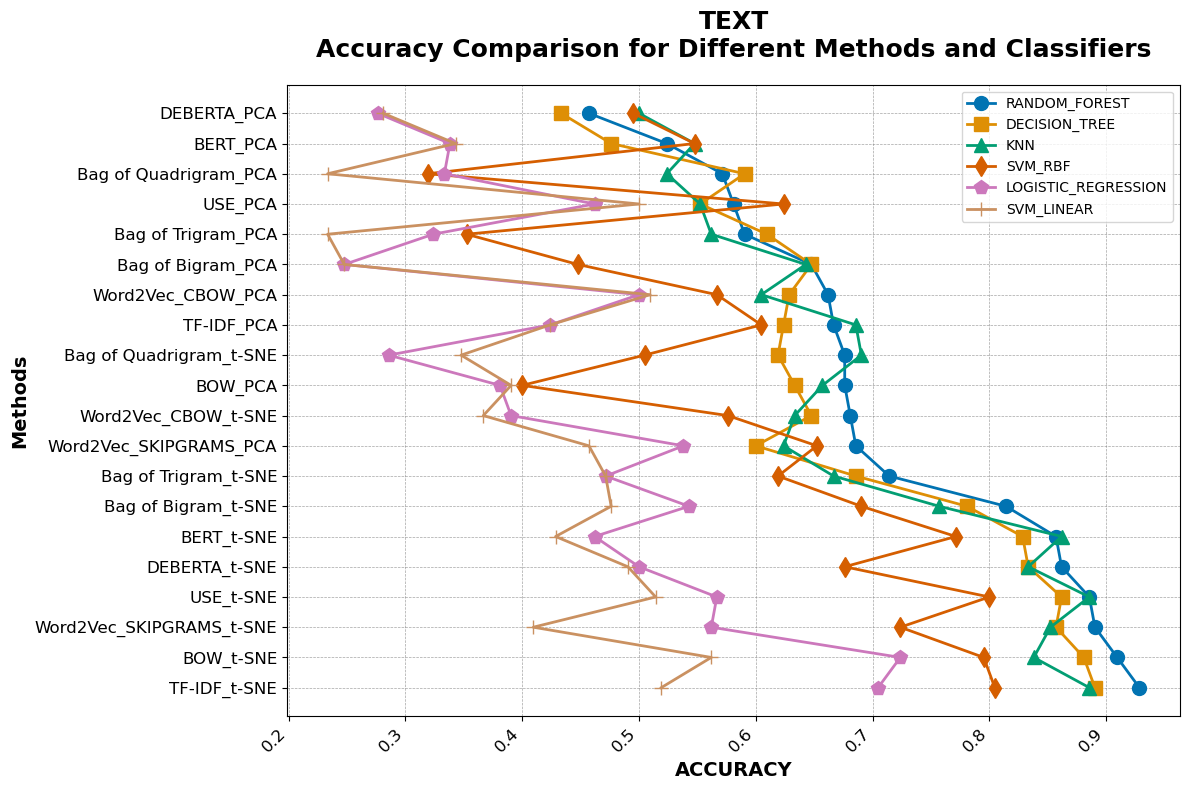

In [59]:
# ==================================================================================================
# PLOT ACCURACY
# ==================================================================================================
# Set the figure size
plt.figure(figsize=(12, 8))
palette = sns.color_palette("colorblind")
# Plot the lines with markers, but with reversed x and y axes
plt.plot(df_merged_accuracy['ACCURACY_RANDOM_FOREST']      , df_merged_accuracy['Method_Representation'], marker='o', color=palette[0], label='RANDOM_FOREST', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_DECISION_TREE']      , df_merged_accuracy['Method_Representation'], marker='s', color=palette[1], label='DECISION_TREE', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_KNN']                , df_merged_accuracy['Method_Representation'], marker='^', color=palette[2], label='KNN', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_SVM_RBF']            , df_merged_accuracy['Method_Representation'], marker='d', color=palette[3], label='SVM_RBF', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_Logistic_Regression'], df_merged_accuracy['Method_Representation'], marker='p', color=palette[4], label='LOGISTIC_REGRESSION', linewidth=2)
plt.plot(df_merged_accuracy['ACCURACY_SVM_linear']         , df_merged_accuracy['Method_Representation'], marker='+', color=palette[5], label='SVM_LINEAR', linewidth=2)


# Add labels and title
plt.xlabel('ACCURACY')
plt.ylabel('Methods')
plt.title('TEXT\nAccuracy Comparison for Different Methods and Classifiers')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Invert the y-axis to reverse the order of models
plt.gca().invert_yaxis()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# ==================================================================================================
# DEBERTA RESULTS FOR ACCURACY AND ARI
# ==================================================================================================

In [66]:
# ACCURACY
df_merged_accuracy[df_merged_accuracy['Method_Representation'].str.contains("DEBERTA")].T

,19,4
Method_Representation,DEBERTA_PCA,DEBERTA_t-SNE
ACCURACY_RANDOM_FOREST,0.46,0.86
ACCURACY_DECISION_TREE,0.43,0.83
ACCURACY_KNN,0.5,0.83
ACCURACY_SVM_RBF,0.5,0.68
ACCURACY_Logistic_Regression,0.28,0.5
ACCURACY_SVM_linear,0.28,0.49


In [68]:
# ARI
df_merged[df_merged['Method_Representation'].str.contains("DEBERTA")].T

,19,4
Method_Representation,DEBERTA_PCA,DEBERTA_t-SNE
ARI_RANDOM_FOREST,0.17,0.7
ARI_DECISION_TREE,0.14,0.66
ARI_KNN,0.2,0.65
ARI_SVM_RBF,0.19,0.44
ARI_Logistic_Regression,0.11,0.27
ARI_SVM_linear,0.1,0.28
